# Convexity Problems in Machine Learning

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.random import seed, randn
from sklearn.linear_model import LinearRegression

plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (10,7.5)

In [3]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
def lreg(x, theta): return theta.T @ x
def nnet(x, W1, W2): return W2 @ sigmoid(W1 @ x)


def loss_surface(model_parameters, target_weights, target_ix, model, y):
    """
    Function to return the cost surface between two chosen weights
    in a model and its L2 loss surface.
    
    Parameters
    ----------
    model_parameters: tuple containing the parameters to compute the model
    target_weights: tuple of lenght 2 containing the parameters compute the loss
    target_ix: typle of lenght 2 containing the indices for each parameter to
               compute the loss
    model: function with parameters "model_parameters" used to compute the output of
           the model
    y: vector with m model outputs
    
    Returns
    -------
    tuppple with grid containing the surface along the chosen parameters
    """
    # target weights
    tweight1, tweight2 = target_weights
    # target indices
    tix1, tix2 = target_ix
    
    # Grid surface for target weights to plot
    tw1, tw2 = np.mgrid[-5:5:0.1, -5:5:0.1]
    # Initialize cost surface
    J = np.zeros_like(tw1.ravel())
    
    for ix, (tw1i, tw2i) in enumerate(zip(tw1.ravel(), tw2.ravel())):
        tweight1[tix1] = tw1i
        tweight2[tix2] = tw2i
        yhat = model(*model_parameters)
        # Updating cost function
        try:
            J[ix] =  np.sum((yhat - y) ** 2) / 2
        except Exception:
            print(ix)
        
    J = J.reshape(*tw1.shape)
    return tw1, tw2, J


def plot_2dconvex_test(func, alpha, xline, xlims, ax=None):
    """
    Parameters
    ----------
    func: function
        The f:R->R function to test convexity
    alpha: alpha
        value between 0 and 1 inclusive to compare heights
    xline: tuple with len = 2
        Lower and upper limits to draw the line that goes from
        f(x1) to f(x2)
    xlims: tuple with len = 2
        Lower and upper limits of the neighborhood to show the function
    """
    x = np.linspace(*xlims, 100)
    x1, x2 = xline
    val_point = alpha * x1 + (1 - alpha) * x2
    # Lower bound for convex function
    ylow = func(alpha * x1 + (1 - alpha) * x2)
    # Upper bound for convex function
    yupp = alpha * func(x1) + (1 - alpha) * func(x2)
    
    if ax is None:
        ax = plt
        
    ax.plot([x1, x2], [func(x1), func(x2)], color="tab:red")
    ax.scatter(val_point, ylow, color="tab:red")
    ax.scatter(val_point, yupp, color="tab:red")
    ax.plot(x, func(x))
    
def grad_desc_r1(f, fprime, x0, alpha=0.1, iterations=10):
    """
    Compute the gradient descent path for a function f:R->R
    Parameters
    ----------
    f: function
        The f:R->R function to apply gradient descent on
    fprime: function
        The first derivative of f
    x0: int
        Initial value to iterate
        
    Returns
    -------
    tuple with changes in x and f(x)
    """
    x0 = 1
    gradx, grady = [x0], [f(x0)]
    for i in range(iterations):
        x = gradx[-1]
        x -= alpha * fprime(x)
        gradx.append(x)
        grady.append(f(x))
        
    return gradx, grady

## Definition of a convex function

A function $f$ is said to be convex if $\forall x_1, x_2 \in D_f$ and $\alpha \in [0, 1]$
$$
    f(\alpha x_1 + (1 - \alpha) x_2) \leq \alpha f(x_1) + (1 - \alpha)f(x_2)
$$

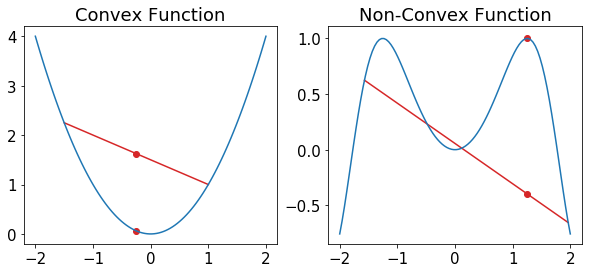

In [4]:
from math import pi
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plot_2dconvex_test(lambda x: x**2, 0.5, (-1.5, 1), (-2, 2), ax1)
plot_2dconvex_test(lambda x: np.sin(x**2), 0.2, (-pi/2, 10 * pi / 16), (-2, 2), ax2)
ax1.set_title("Convex Function")
ax2.set_title("Non-Convex Function");
plt.savefig("conv_nonconvR2.pdf")

In [5]:
alpha = 0.2
x1, x2 = -pi/2, 10 * pi / 16

print("Convex evaluation of f: {:0.4f}".format(np.sin((alpha * x1 + (1 - alpha) * x2)**2)))
print("Evaluation of the linear between f(x1) and f(x2): {:0.4f}".format(alpha * np.sin(x1 ** 2) + (1 - alpha) * np.sin(x2 ** 2)))

Convex evaluation of f: 1.0000
Evaluation of the linear between f(x1) and f(x2): -0.3989


For this experiment, we want to model model the relationship $g(X_i) \approx y_i$, where $X_i$ is a random vector whose entries are i.i.d. $N(0, 1)$, and $y_i \sim N(0,1)$ is the output variable.

We consider two models: a linear regression and a single-hiden-layer neural network with sigmoid activation function and linear output. The goal is to analize the loss surface for these two models.

## Loss Surface Under a Linear Regression Model
Considering $n$ training examples, we assume the linear relationship

$$
    \hat{y} = \theta^TX \approx y
$$

With $X\in\mathbb{R}^{m\times n}$, $\theta\in\mathbb{R}^{m}$

Where we want to learn $\theta$ such that
$$
\begin{align}
    J(\theta) &= \frac{1}{2}\sum_{i}^n\left(\hat{y}_i - y_i\right) ^ 2 \\
            &= \frac{1}{2}\sum_{i}^n\left(\theta^TX - y_i\right) ^ 2
\end{align}
$$

is as small as possible.

The surface for $J$ for linear model considering $\theta$ and $b$ is *convex*.

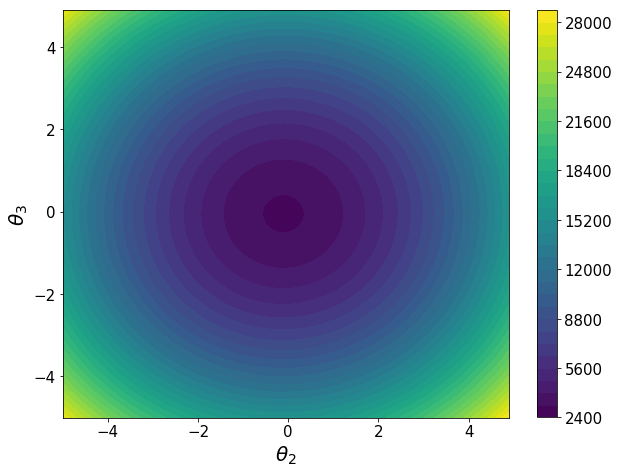

In [5]:
seed(31415)
nobs = 1000
x = randn(10, nobs)
y = randn(1, nobs)

# Initializing the weights
w1 = randn(10, 1)

ax1, ax2 = 2, 3
p1, p2, J = loss_surface((x, w1), (w1, w1), ((ax1, 0), (ax2, 0)), lreg, y)
plt.contourf(p1, p2, J, 40)
plt.colorbar()
plt.xlabel(r"$\theta_{}$".format(ax1), fontsize=20)
plt.ylabel(r"$\theta_{}$".format(ax2), fontsize=20);
#plt.savefig("lreg_loss.pdf")

## Loss surface under a single hiden-layer neural network

With $n$ training examples, assume the the relationship
$$
    \hat{y} = W^{[2]}\sigma (W^{[1]} X) \approx y
$$

With
$X\in\mathbb{R}^{m\times n}$, $W^{[1]} \in \mathbb{R}^{k, m}$, $W^{[2]} \in \mathbb{R}^{1, k}$ and $\sigma(x) = 1/{(1 + e^{-x})}$ is the sigmoid activation function

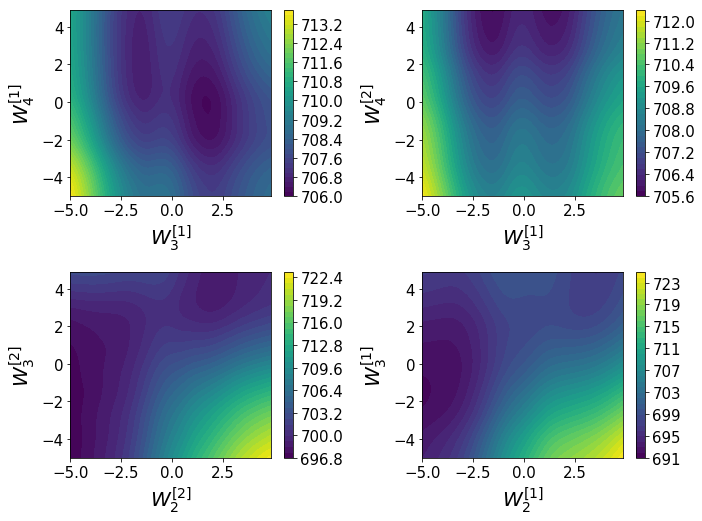

In [7]:
seed(31415)

# Creating the samples
nobs = 1000
x = randn(10, nobs)
y = randn(1, nobs)

# Initializing the weights
w1 = randn(4, 10)
w2 = randn(1, 4)

cuts = [((2,0), (3,0)),
        ((2,0), (3,1)),
        ((1,1), (2,1)),
        ((1,0), (2,0))]

fig = plt.figure()
for ix, cut in enumerate(cuts):
    ax = fig.add_subplot(2, 2, ix + 1)
    p1, p2, J = loss_surface((x, w1, w2), (w1, w1), cut, nnet, y)
    plt.contourf(p1, p2, J, 40)
    plt.colorbar()
    (cut1_ix, cut1_layer), (cut2_ix, cut2_layer) = cut
    xlab = "$W^{[" + f"{cut1_layer + 1}" + "]}" + f"_{cut1_ix + 1}$"
    ylab = "$W^{[" + f"{cut2_layer + 1}" + "]}" + f"_{cut2_ix + 1}$"
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
plt.tight_layout()

plt.savefig("nnet_loss.pdf")

## The problem of simple Gradient Descent

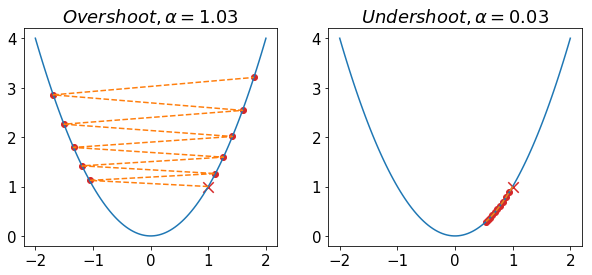

In [16]:
def f(x): return x**2
def fprime(x): return 2 * x
dom = np.linspace(-2, 2, 100)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

alpha1, alpha2 = 1.03, 0.03
grad1x, grad1y = grad_desc_r1(f, fprime, 1.5, alpha=alpha1)
grad2x, grad2y = grad_desc_r1(f, fprime, 1.5, alpha=alpha2)

ax1.set_title(r"$Overshoot, \alpha={}$".format(alpha1))
ax1.plot(dom, f(dom))
ax1.plot(grad1x, grad1y, color="tab:orange", linestyle="--")
ax1.scatter(grad1x[0], grad1y[0], color="tab:red", marker="x", s=110)
ax1.scatter(grad1x[1:], grad1y[1:], color="tab:red");

ax2.set_title(r"$Undershoot, \alpha={}$".format(alpha2))
ax2.plot(dom, f(dom))
ax2.plot(grad2x, grad2y, color="tab:orange", linestyle="--")
ax2.scatter(grad2x[0], grad2y[0], color="tab:red", marker="x", s=110)
ax2.scatter(grad2x[1:], grad2y[1:], color="tab:red");
plt.savefig("graddesc.pdf")